In [1]:
import os
import pandas as pd
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the Excel file and create folders for TUMOR and NON-TUMOR images

excel_file = 'D:/MACHINE LEARNING/new/files/data.csv'
image_base_path = 'D:/MACHINE LEARNING/new/dataset_6/CT SCAN DATASET'
tumor_folder = 'D:/MACHINE LEARNING/new/classified_images/TUMOR'
non_tumor_folder = 'D:/MACHINE LEARNING/new/classified_images/NON TUMOR'

In [3]:
# Create folders if they don't exist
os.makedirs(tumor_folder, exist_ok=True)
os.makedirs(non_tumor_folder, exist_ok=True)

# Read the Excel file
df = pd.read_csv(excel_file)

# Function to copy images to the respective folders
def copy_images(row, target_folder):
    for col in ['filepath', 'liver_maskpath', 'tumor_maskpath']:
        src = os.path.join(image_base_path, row[col])
        dst = os.path.join(target_folder, row[col])
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy2(src, dst)

# Process each row in the DataFrame
for _, row in df.iterrows():
    if row['tumor_mask_empty']:
        copy_images(row, tumor_folder)
    else:
        copy_images(row, non_tumor_folder)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

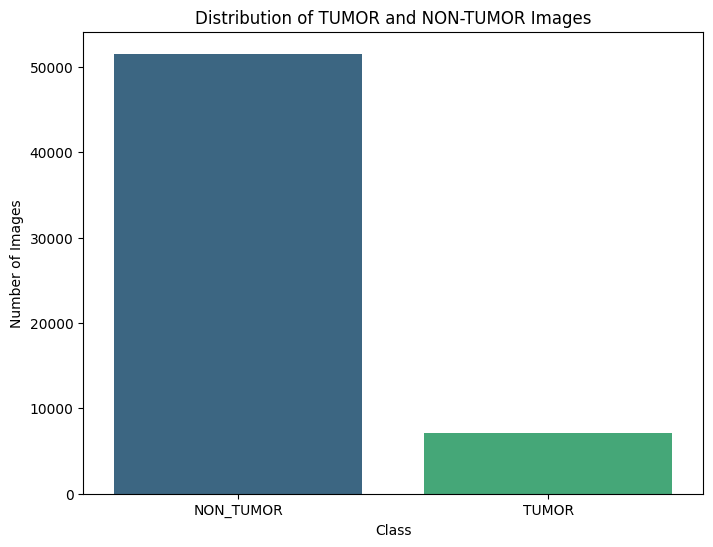

In [4]:
# Step 2: 3D Visualization of the Process
# For visualization, we can create a bar plot to show the number of images in each class

counts = df['tumor_mask_empty'].value_counts()
counts.index = ['NON_TUMOR', 'TUMOR']

plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Distribution of TUMOR and NON-TUMOR Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

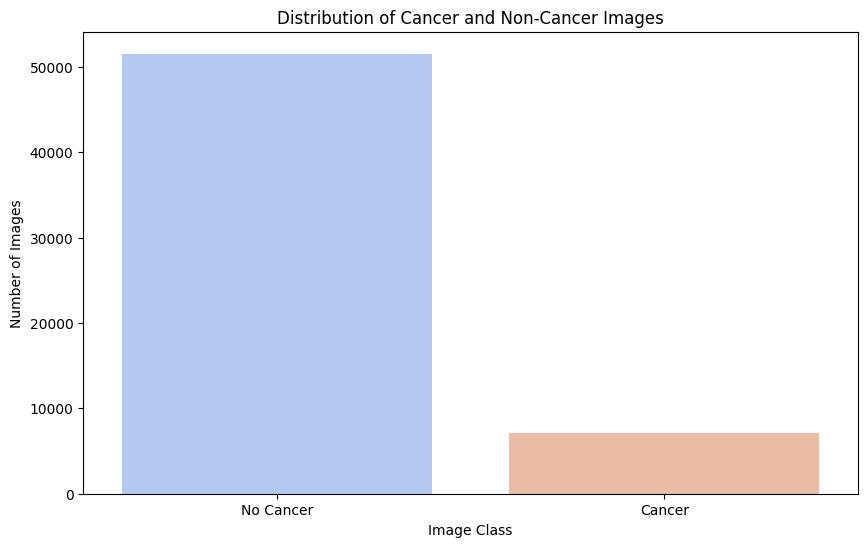

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
excel_file = 'D:/MACHINE LEARNING/new/files/data.csv'
df = pd.read_csv(excel_file)

# Count the number of images that contain cancer and do not contain cancer
cancer_count = df['tumor_mask_empty'].value_counts()

# Map the boolean values to more readable labels
cancer_count.index = ['No Cancer', 'Cancer']

# Plot the distribution of images containing cancer and not containing cancer
plt.figure(figsize=(10, 6))
sns.barplot(x=cancer_count.index, y=cancer_count.values, palette='coolwarm')
plt.title('Distribution of Cancer and Non-Cancer Images')
plt.xlabel('Image Class')
plt.ylabel('Number of Images')
plt.show()


In [6]:
import os
import pandas as pd

# Define the paths
excel_file = 'D:/MACHINE LEARNING/new/files/data.csv'
tumor_folder = 'D:/MACHINE LEARNING/new/classified_images/TUMOR'
non_tumor_folder = 'D:/MACHINE LEARNING/new/classified_images/NON TUMOR'

# Read the Excel file
df = pd.read_csv(excel_file)

# Function to check if files are present in the specified folder
def check_images_in_folder(row, folder):
    for col in ['filepath', 'liver_maskpath', 'tumor_maskpath']:
        image_path = os.path.join(folder, row[col])
        if not os.path.exists(image_path):
            return False
    return True

In [7]:
# Check if images are present in the respective folders
tumor_missing = []
non_tumor_missing = []

for _, row in df.iterrows():
    if row['tumor_mask_empty']:  # Should be in TUMOR folder
        if not check_images_in_folder(row, tumor_folder):
            tumor_missing.append(row)
    else:  # Should be in NON-TUMOR folder
        if not check_images_in_folder(row, non_tumor_folder):
            non_tumor_missing.append(row)

In [8]:
# Report results
print(f"Number of rows with missing images in TUMOR folder: {len(tumor_missing)}")
print(f"Number of rows with missing images in NON-TUMOR folder: {len(non_tumor_missing)}")

if tumor_missing:
    print("\nRows with missing images in TUMOR folder:")
    print(pd.DataFrame(tumor_missing))
    
if non_tumor_missing:
    print("\nRows with missing images in NON-TUMOR folder:")
    print(pd.DataFrame(non_tumor_missing))

Number of rows with missing images in TUMOR folder: 0
Number of rows with missing images in NON-TUMOR folder: 0


In [9]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
excel_file = 'D:/MACHINE LEARNING/new/files/data.csv'
tumor_folder = 'D:/MACHINE LEARNING/new/classified_images/TUMOR'
non_tumor_folder = 'D:/MACHINE LEARNING/new/classified_images/NON TUMOR'
train_folder = 'D:/MACHINE LEARNING/new/TRAIN'
test_folder = 'D:/MACHINE LEARNING/new/TEST'

In [10]:
# Create folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Read the Excel file
df = pd.read_csv(excel_file)

# Function to copy images to the respective folders
def copy_images(row, target_folder):
    for col in ['filepath', 'liver_maskpath', 'tumor_maskpath']:
        if row['tumor_mask_empty']:
            src = os.path.join(tumor_folder, row[col])
        else:
            src = os.path.join(non_tumor_folder, row[col])
        dst = os.path.join(target_folder, row[col])
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy2(src, dst)

In [11]:
# Split the rows into training and testing sets (80:20 ratio)
train_rows, test_rows = train_test_split(df, test_size=0.2, stratify=df['tumor_mask_empty'], random_state=42)

# Copy images to the respective folders
for _, row in train_rows.iterrows():
    copy_images(row, train_folder)

for _, row in test_rows.iterrows():
    copy_images(row, test_folder)

print("Images have been successfully split and copied into training and testing folders.")

Images have been successfully split and copied into training and testing folders.


In [13]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths
excel_file = 'D:/MACHINE LEARNING/new/files/data.csv'
tumor_folder = 'D:/MACHINE LEARNING/new/classified_images/TUMOR'
non_tumor_folder = 'D:/MACHINE LEARNING/new/classified_images/NON TUMOR'
train_folder = 'D:/MACHINE LEARNING/new/TRAIN'
test_folder = 'D:/MACHINE LEARNING/new/TEST'

# Read the Excel file
df = pd.read_csv(excel_file)

In [14]:
# Split the rows into training and testing sets (80:20 ratio)
train_rows, test_rows = train_test_split(df, test_size=0.2, stratify=df['tumor_mask_empty'], random_state=42)

# Function to check if files are present in the specified folder
def check_images_in_folder(row, folder):
    for col in ['filepath', 'liver_maskpath', 'tumor_maskpath']:
        image_path = os.path.join(folder, row[col])
        if not os.path.exists(image_path):
            return False
    return True

# Check if images from the same row are in the same folder
train_missing = []
test_missing = []

for _, row in train_rows.iterrows():
    if not check_images_in_folder(row, train_folder):
        train_missing.append(row)

for _, row in test_rows.iterrows():
    if not check_images_in_folder(row, test_folder):
        test_missing.append(row)

Number of rows with missing images in TRAIN folder: 0
Number of rows with missing images in TEST folder: 0


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a f

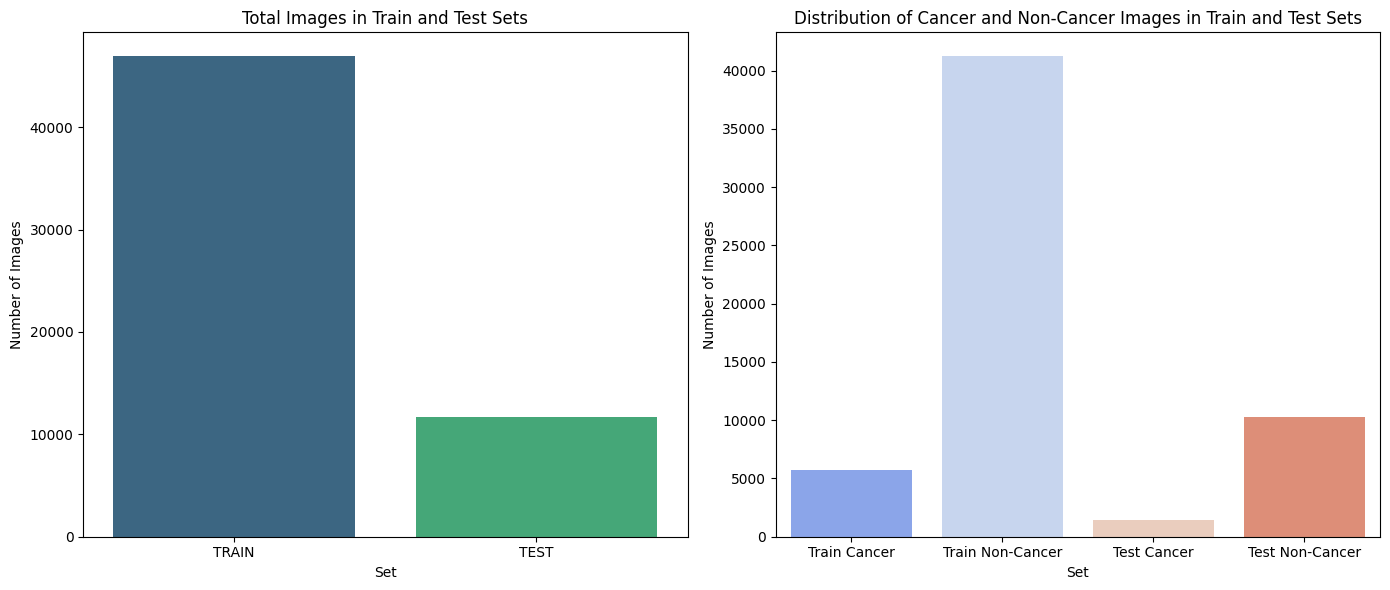

In [15]:
# Print results
print(f"Number of rows with missing images in TRAIN folder: {len(train_missing)}")
print(f"Number of rows with missing images in TEST folder: {len(test_missing)}")

# Visualization
def visualize_split(train_rows, test_rows):
    # Count the number of rows in each set
    train_count = len(train_rows)
    test_count = len(test_rows)
    
    # Count the number of cancer and non-cancer rows in each set
    train_cancer_count = train_rows['tumor_mask_empty'].sum()
    test_cancer_count = test_rows['tumor_mask_empty'].sum()
    train_non_cancer_count = train_count - train_cancer_count
    test_non_cancer_count = test_count - test_cancer_count
    
    # Plot the distribution of training and testing images
    plt.figure(figsize=(14, 6))
    
    # Total images in train and test
    plt.subplot(1, 2, 1)
    sns.barplot(x=['TRAIN', 'TEST'], y=[train_count, test_count], palette='viridis')
    plt.title('Total Images in Train and Test Sets')
    plt.xlabel('Set')
    plt.ylabel('Number of Images')
    
    # Cancer and non-cancer images in train and test
    plt.subplot(1, 2, 2)
    sns.barplot(x=['Train Cancer', 'Train Non-Cancer', 'Test Cancer', 'Test Non-Cancer'],
                y=[train_cancer_count, train_non_cancer_count, test_cancer_count, test_non_cancer_count],
                palette='coolwarm')
    plt.title('Distribution of Cancer and Non-Cancer Images in Train and Test Sets')
    plt.xlabel('Set')
    plt.ylabel('Number of Images')
    
    plt.tight_layout()
    plt.show()

visualize_split(train_rows, test_rows)

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the paths
excel_file = 'D:/MACHINE LEARNING/new/files/data.csv'
train_folder = 'D:/MACHINE LEARNING/new/TRAIN'
test_folder = 'D:/MACHINE LEARNING/new/TEST'

# Read the Excel file
df = pd.read_csv(excel_file)

In [27]:
# Convert tumor_mask_empty column to strings
df['tumor_mask_empty'] = df['tumor_mask_empty'].astype(str)

# Split the rows into training and testing sets (80:20 ratio)
train_rows, test_rows = train_test_split(df, test_size=0.2, stratify=df['tumor_mask_empty'], random_state=42)

# Further reduce the size for training and testing data
train_rows = train_rows.sample(frac=0.13, random_state=42)
test_rows = test_rows.sample(frac=0.23, random_state=42)

In [28]:
# Data generators
datagen = ImageDataGenerator(rescale=1.0/255.0)

def create_generators(train_df, test_df, train_folder, test_folder, batch_size=32, target_size=(224, 224)):
    train_generator = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=train_folder,
        x_col='filepath',
        y_col='tumor_mask_empty',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    test_generator = datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=test_folder,
        x_col='filepath',
        y_col='tumor_mask_empty',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary'
    )
    return train_generator, test_generator

train_generator, test_generator = create_generators(train_rows, test_rows, train_folder, test_folder)

Found 6098 validated image filenames belonging to 2 classes.
Found 2697 validated image filenames belonging to 2 classes.


In [29]:

# Model definitions
def build_model(base_model):
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

vgg16_base = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
resnet50_base = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

vgg16_model = build_model(vgg16_base)
resnet50_model = build_model(resnet50_base)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
# Training VGG16 model
history_vgg16 = vgg16_model.fit(
    train_generator,
    epochs=10,  # Perform only 10 epochs
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Training ResNet50 model
history_resnet50 = resnet50_model.fit(
    train_generator,
    epochs=10,  # Perform only 10 epochs
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/10
191/191 [==============================] - 2251s 12s/step - loss: 0.2963 - accuracy: 0.8823 - val_loss: 0.2252 - val_accuracy: 0.8928
Epoch 2/10
191/191 [==============================] - 2303s 12s/step - loss: 0.2084 - accuracy: 0.8955 - val_loss: 0.2304 - val_accuracy: 0.8851
Epoch 3/10
191/191 [==============================] - 2325s 12s/step - loss: 0.1922 - accuracy: 0.9106 - val_loss: 0.1985 - val_accuracy: 0.9032
Epoch 4/10
191/191 [==============================] - 2476s 13s/step - loss: 0.1765 - accuracy: 0.9205 - val_loss: 0.2169 - val_accuracy: 0.8836
Epoch 5/10
191/191 [==============================] - 2202s 12s/step - loss: 0.1487 - accuracy: 0.9359 - val_loss: 0.1781 - val_accuracy: 0.9162
Epoch 6/10
191/191 [==============================] - 2200s 12s/step - loss: 0.1308 - accuracy: 0.9436 - val_loss: 0.1529 - val_accuracy: 0.9314
Epoch 7/10
191/191 [==============================] - 2199s 12s/step - loss: 0.1110 - accuracy: 0.9564 - val_loss: 0.1356 - val_ac

In [32]:
# Evaluating models
def evaluate_model(model, test_generator):
    test_generator.reset()
    preds = model.predict(test_generator, verbose=1)
    preds = (preds > 0.5).astype(int)
    labels = test_generator.labels
    accuracy = accuracy_score(labels, preds)
    cm = confusion_matrix(labels, preds)
    cr = classification_report(labels, preds)
    return accuracy, cm, cr

accuracy_vgg16, cm_vgg16, cr_vgg16 = evaluate_model(vgg16_model, test_generator)
accuracy_resnet50, cm_resnet50, cr_resnet50 = evaluate_model(resnet50_model, test_generator)

85/85 [==============================] - 123s 1s/step


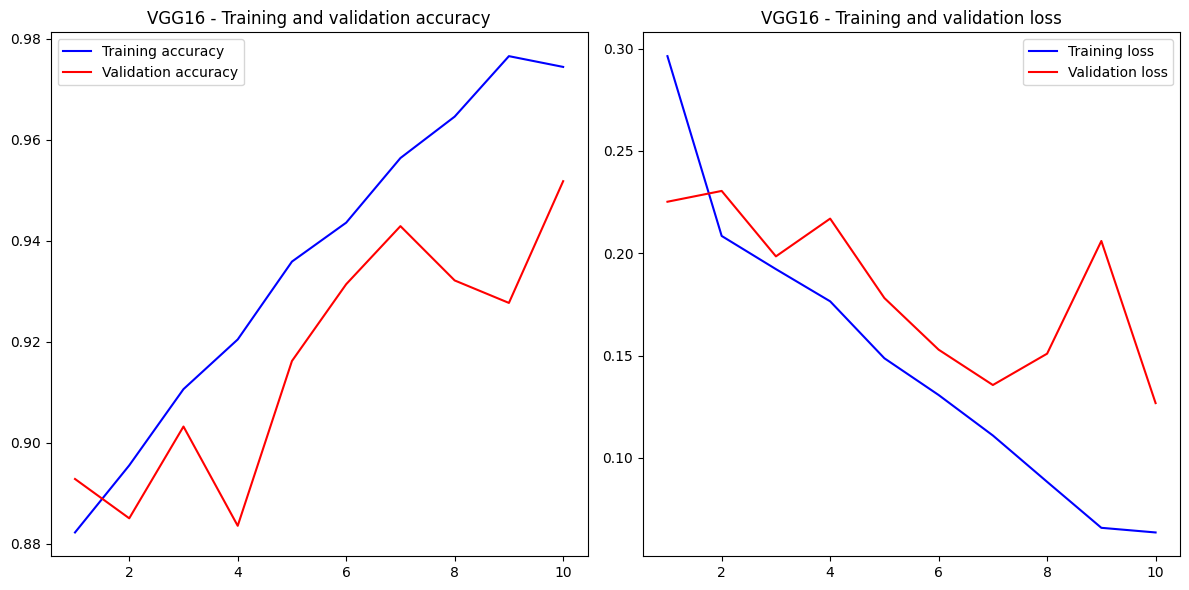

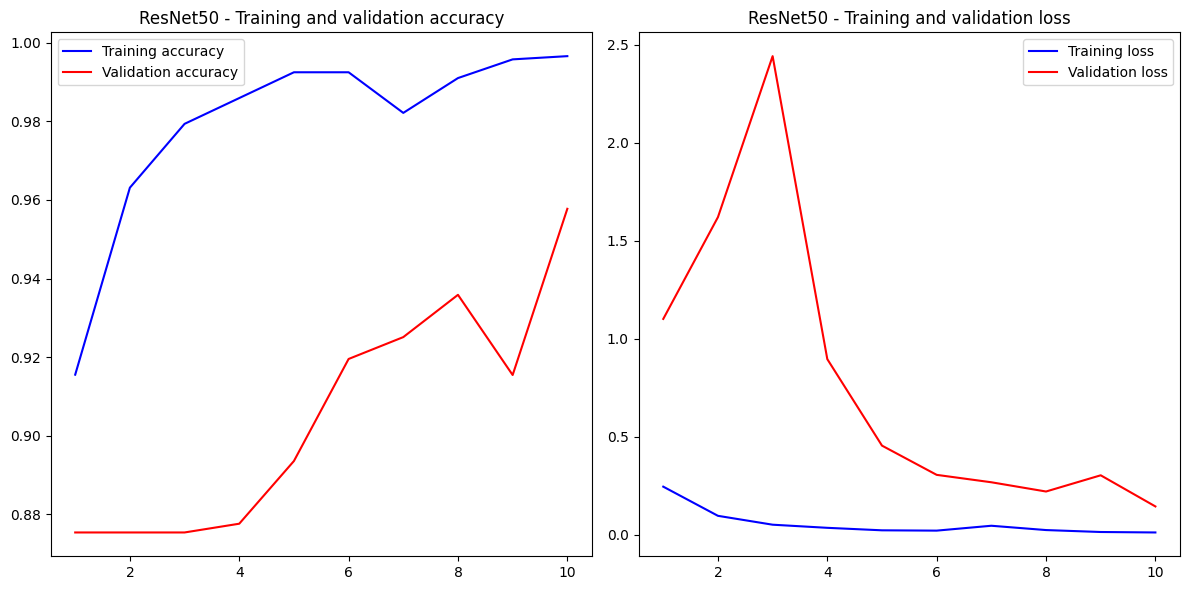

In [37]:
# Plotting training history
def plot_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{title} - Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{title} - Training and validation loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_vgg16, 'VGG16')
plot_training_history(history_resnet50, 'ResNet50')

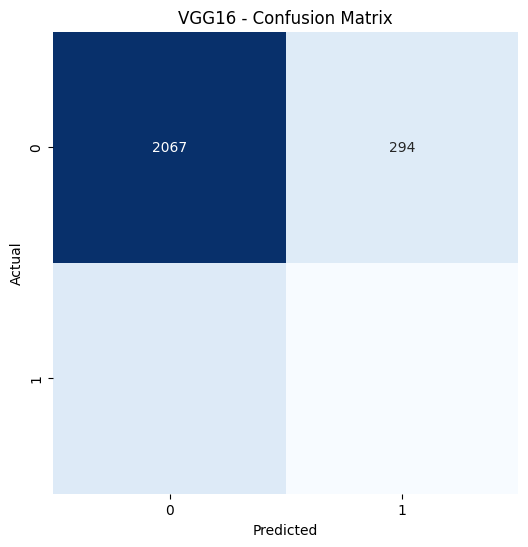

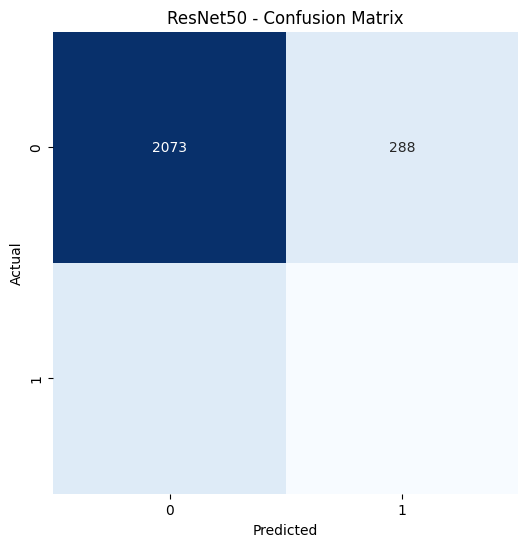

In [40]:
# Displaying confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(cm_vgg16, 'VGG16')
plot_confusion_matrix(cm_resnet50, 'ResNet50')

VGG16 Model - Sample Predictions
1/1 [==============================] - 1s 728ms/step


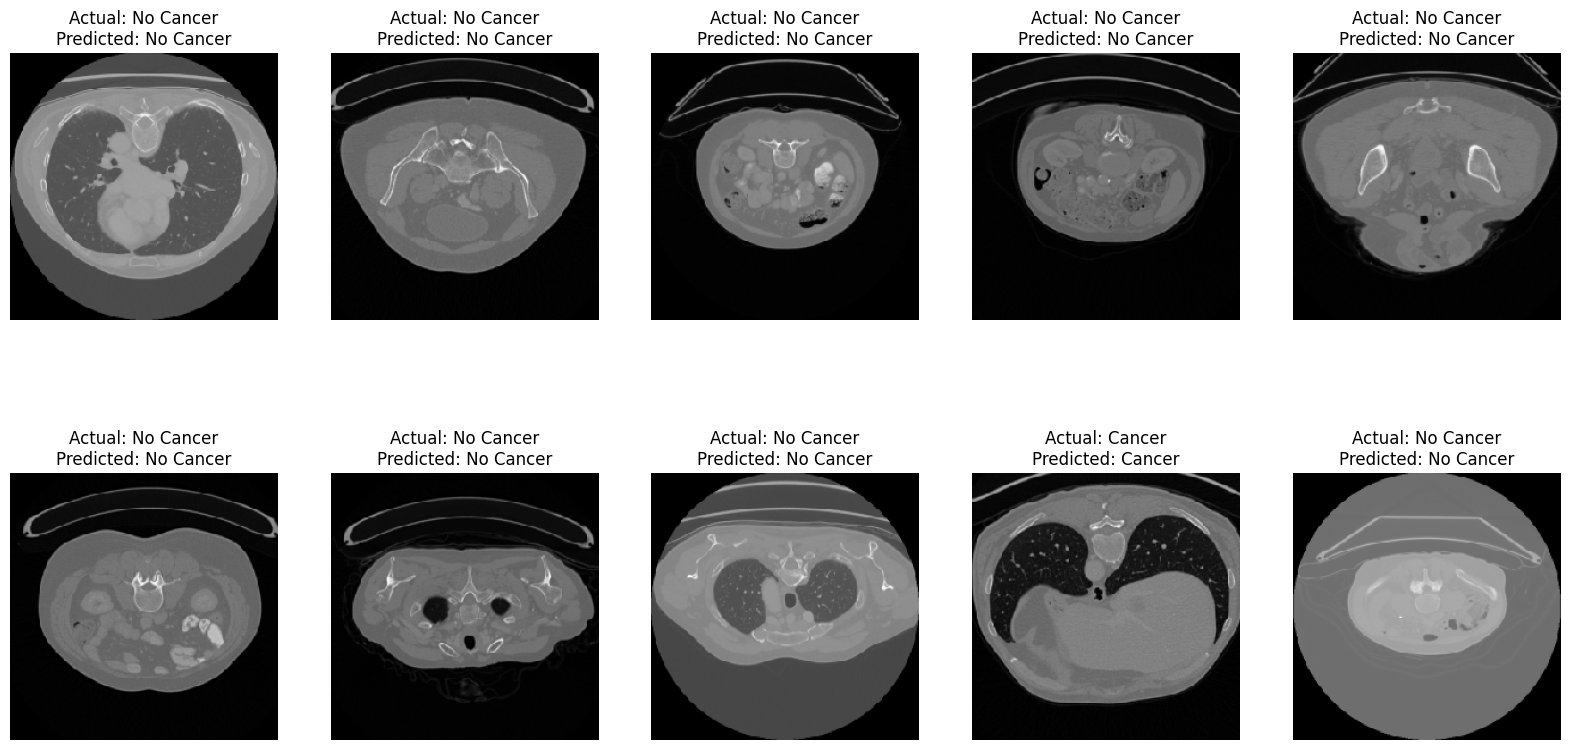

ResNet50 Model - Sample Predictions
1/1 [==============================] - 1s 540ms/step


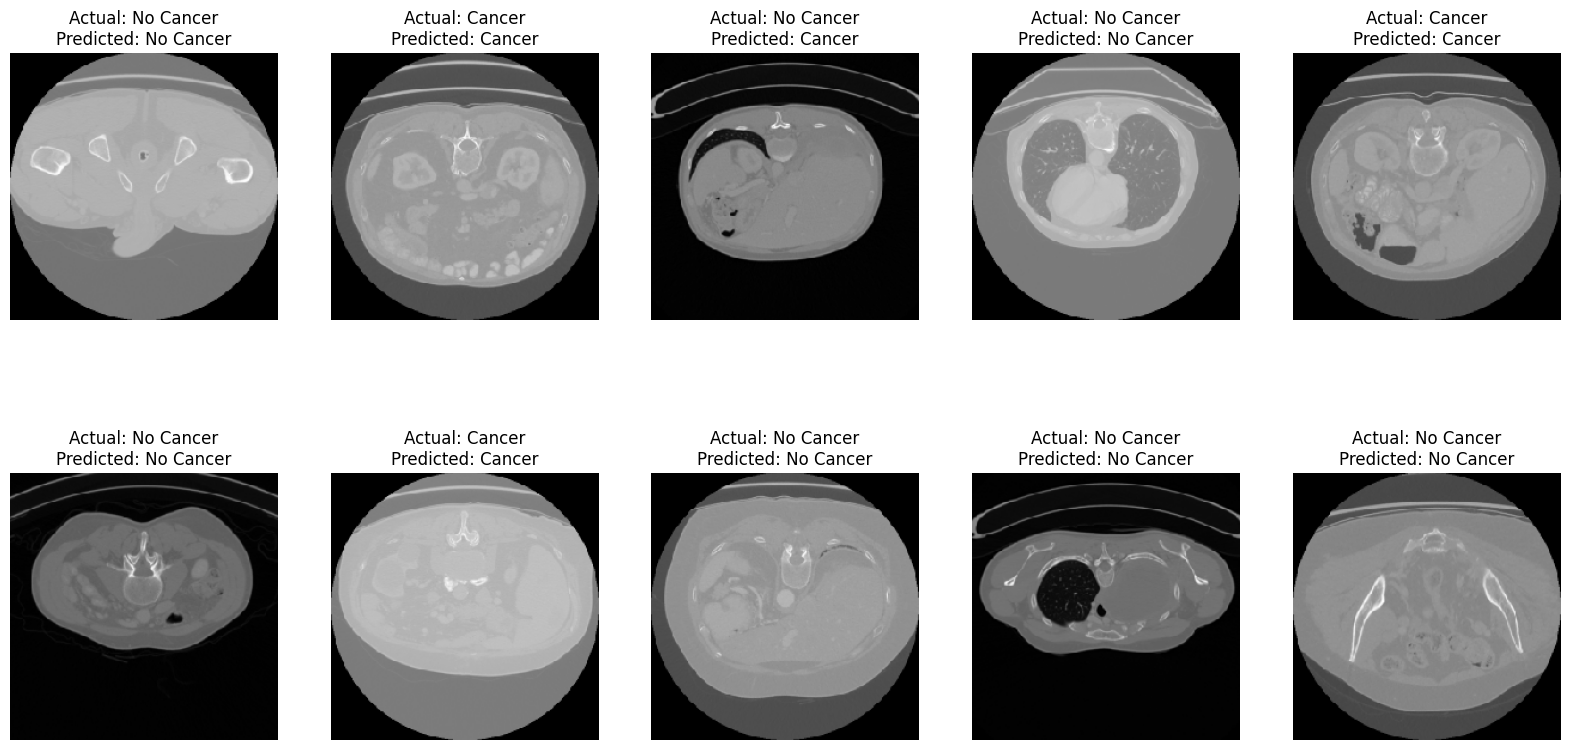

In [46]:
# Displaying sample predictions
def display_sample_predictions(model, generator, num_samples=10):
    generator.reset()
    sample_gen = generator.next()
    sample_images = sample_gen[0][:num_samples]
    sample_labels = sample_gen[1][:num_samples]
    preds = model.predict(sample_images)
    preds = (preds > 0.5).astype(int)

    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(sample_images[i])
        plt.title(f'Actual: {"Cancer" if sample_labels[i] == 1 else "No Cancer"}\nPredicted: {"Cancer" if preds[i] == 1 else "No Cancer"}')
        plt.axis('off')
    plt.show()

print("VGG16 Model - Sample Predictions")
display_sample_predictions(vgg16_model, test_generator)

print("ResNet50 Model - Sample Predictions")
display_sample_predictions(resnet50_model, test_generator)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a f

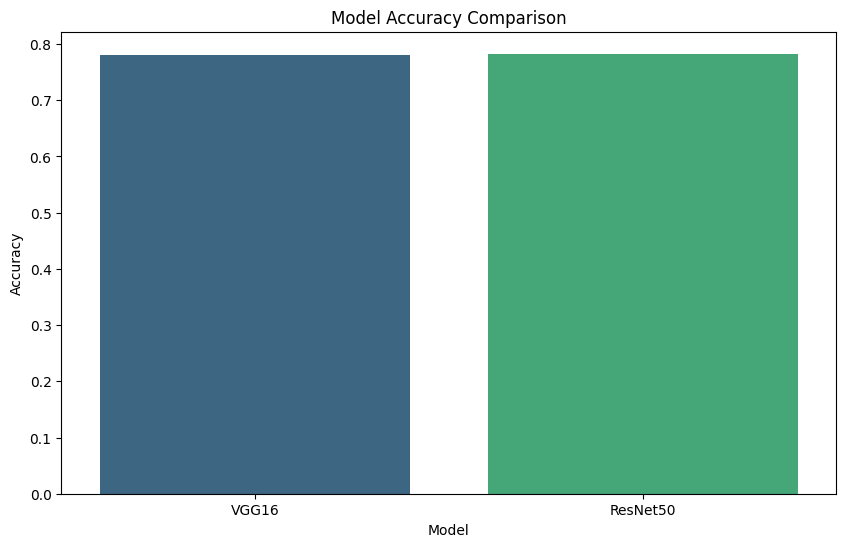

In [45]:
# Comparing model performance
models = ['VGG16', 'ResNet50']
accuracies = [accuracy_vgg16, accuracy_resnet50]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()